In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.svm import SVC

In [4]:
myfile=r'C:\Users\Lenovo\Desktop\MLdataset\Social_Network_Ads.csv'

In [6]:
df=pd.read_csv(myfile)
df1=df.copy()
df1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


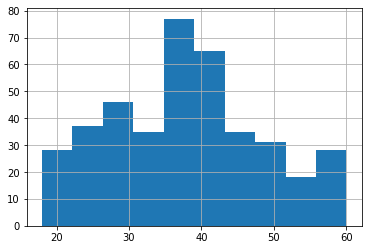

In [9]:
df['Age'].hist()


Different Techniques to check if data is normal


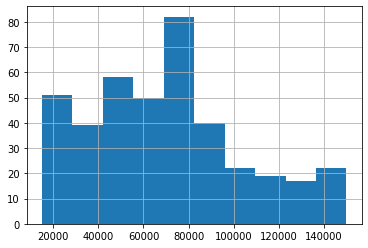

In [22]:
#1.Histogram
df1['EstimatedSalary'].hist()

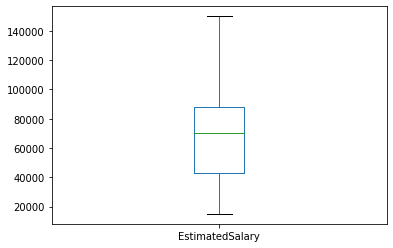

In [24]:
#2.Boxplot
df1['EstimatedSalary'].plot(kind='box')

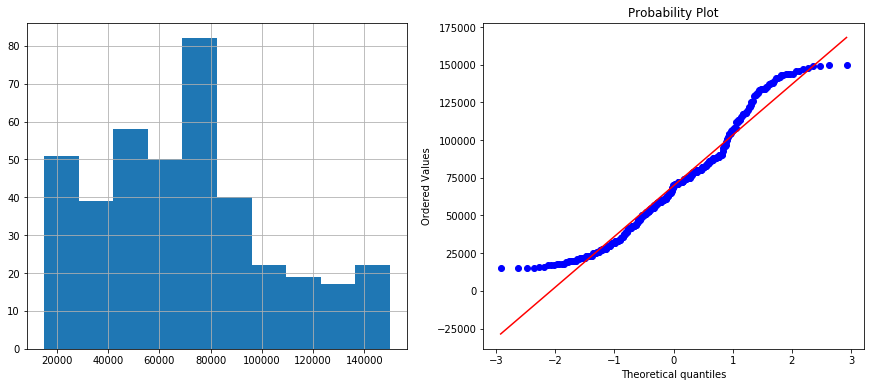

In [25]:
#QQ plot implementataion
def normal_plot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()
normal_plot(df1,'EstimatedSalary')    
    

Here we can see our data is not strictly normal as it does not fit correctly on line

QQ Plot stands for Quantile vs Quantile Plot, which is exactly what it does: plotting theoretical quantiles against the actual quantiles of our variable.If our variable follows a normal distribution, the quantiles of our variable must be perfectly in line with the “theoretical” normal quantiles: a straight line on the QQ Plot tells us we have a normal distribution.


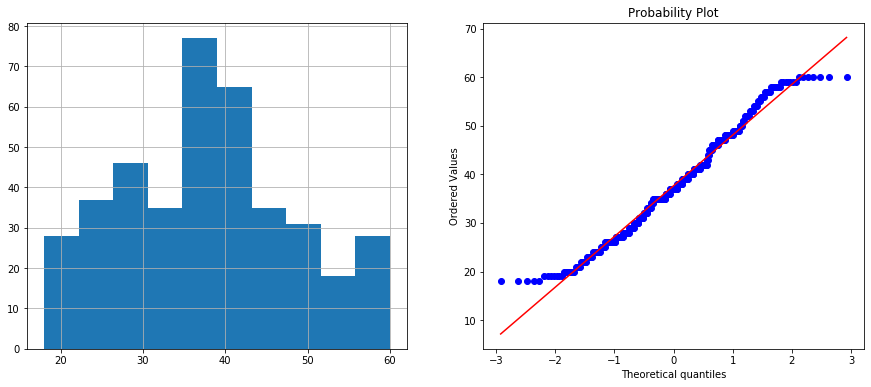

In [26]:
normal_plot(df1,'Age')

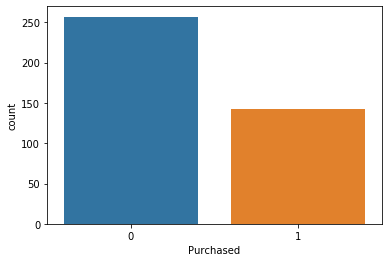

In [19]:
sn.countplot('Purchased',data=df1)

# Some feature transformation Techniques

In [34]:
df2_trans_log=df1.copy()

In [36]:
#1 Logarithmic Transformation
df2_trans_log['Age']=np.log(df2_trans_log['Age']+1)
df2_trans_log.head()

,Age,EstimatedSalary,Purchased
0,0.625561,19000,0
1,0.655049,20000,0
2,0.641435,43000,0
3,0.643236,57000,0
4,0.625561,76000,0


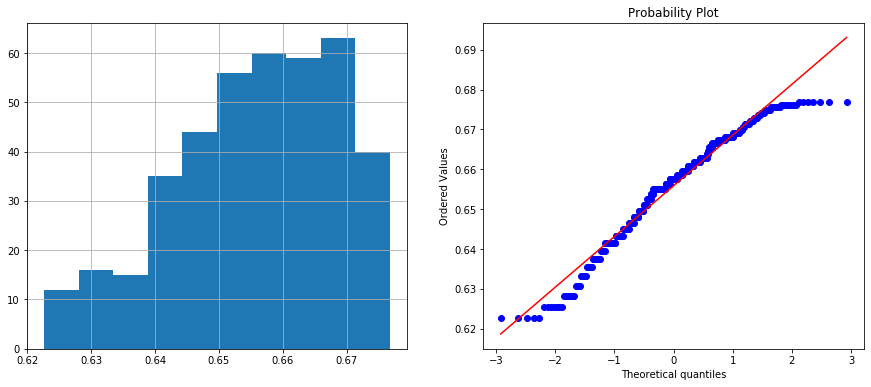

In [37]:
#Now we will see how QQ plot looks like for 'Age'
normal_plot(df2_trans_log,'Age')

In [44]:
x=df1.drop(['Purchased'],axis=1)
y=df1['Purchased']
print(x.shape,y.shape)

(400, 2) (400,)


In [51]:
# train and test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(300, 2) (100, 2) (300,) (100,)


In [76]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)# Training the model
y_pred=logreg.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("confusion_matrix:",cf)

Accuracy: 0.63
confusion_matrix: [[63  0]
 [37  0]]


In [119]:
# NavieBayes algorithm
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
cfm_gnb=confusion_matrix(y_pred,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
class_report=classification_report(y_test,y_pred)
print(class_report)
print(cfm_gnb)

Accuracy: 0.92
Precision: 0.9393939393939394
Recall: 0.8378378378378378
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        63
           1       0.94      0.84      0.89        37

    accuracy                           0.92       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100

[[61  6]
 [ 2 31]]


CONFUSION MATRIX HEATMAP

In [96]:
def heatmapvis(cf_matrix):
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
# create heatmap
  sn.heatmap(pd.DataFrame(cfm_gnb), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

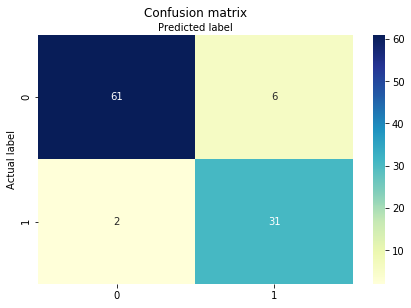

In [97]:
heatmapvis(cfm_gnb)

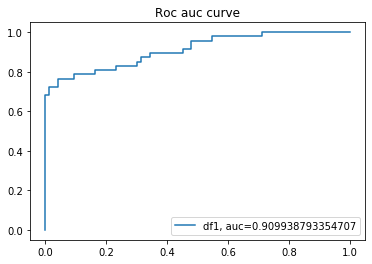

In [141]:
# ROC CURVE
y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.title("Roc auc curve")
plt.show()

# Feature Scaling 

Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
Formula : X' = (X-Xmin)/(Xmax-Xmin), Xmax and Xmin are the maximum and the minimum values of the feature respectively.

Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Formula for Standardization:
X'= (X-mu)/std    mu:mean of feature values and std:standard deviation of feature values

In [123]:
data=df1.copy()
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [128]:
from sklearn.preprocessing import StandardScaler
trans=StandardScaler()
data.iloc[:,0:2]=trans.fit_transform(data.iloc[:,0:2])
X=data.drop(['Purchased'],axis=1)
Y=data['Purchased']
x_train_scale,x_test_scale,y_train_scale,y_test_scale=train_test_split(X,Y,test_size=0.3,random_state=42)

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_scale,y_train_scale)# Training the model
y_pred=logreg.predict(x_test_scale)
cf_logi=confusion_matrix(y_test_scale,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test_scale, y_pred))
print("Precision:",metrics.precision_score(y_test_scale, y_pred))
print("confusion_matrix:",cf)

Accuracy: 0.85
Precision: 0.9393939393939394
confusion_matrix: [[61  6]
 [ 2 31]]


After scaling our variables we can see LogisticRegression classifies target variable effectively. since LogisticRegression uses gradient descent as optimization techniques that's why we need to scale our variables. 

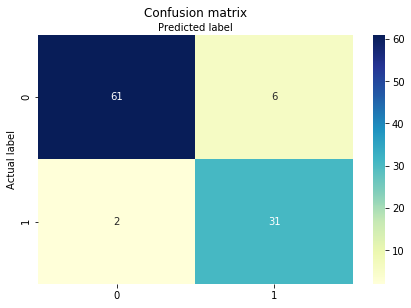

In [130]:
heatmapvis(cf_logi)